<a href="https://colab.research.google.com/github/Sakethkumar100/superstore-eda-project/blob/main/Superstore_Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn


In [7]:
import pandas as pd


df = pd.read_csv("/content/superstore.csv", encoding='ISO-8859-1')  # or encoding='latin1'


df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [9]:
# Drop unneeded columns
df.drop(['Row ID', 'Postal Code', 'Country'], axis=1, inplace=True)

# Check new shape
df.shape


(9994, 18)

In [10]:
# Check duplicates
df.duplicated().sum()

# Drop if any
df.drop_duplicates(inplace=True)


In [11]:
# Convert to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Confirm
df.dtypes


,0
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
City,object
State,object
Region,object


In [12]:
df.columns = df.columns.str.replace(' ', '_')


Data Cleaning Summary
Dropped unused columns, removed duplicates, and converted date columns. Now the dataset is ready for analysis with 18 columns and cleaned data types.

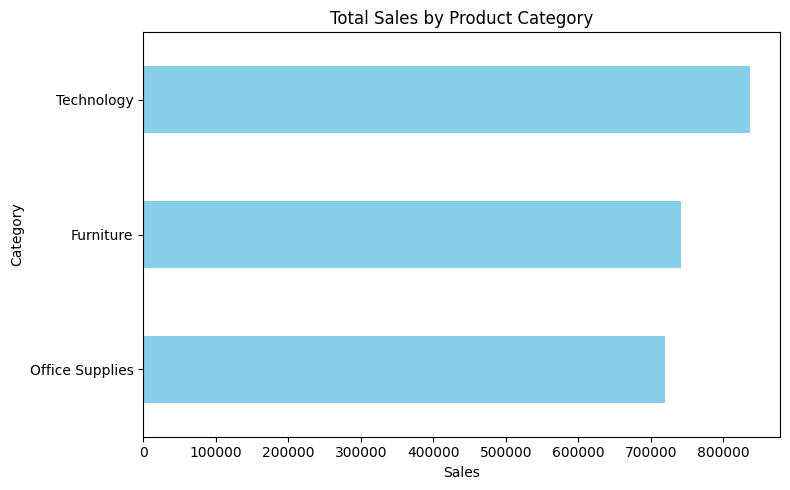

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=True)

# Plot
plt.figure(figsize=(8, 5))
category_sales.plot(kind='barh', color='skyblue')
plt.title("Total Sales by Product Category")
plt.xlabel("Sales")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


1.Which category sells the most?

Ans:By the analysis of the above graph it clearly seen that the sales of technology related items are most followed by furniture items and office supllies

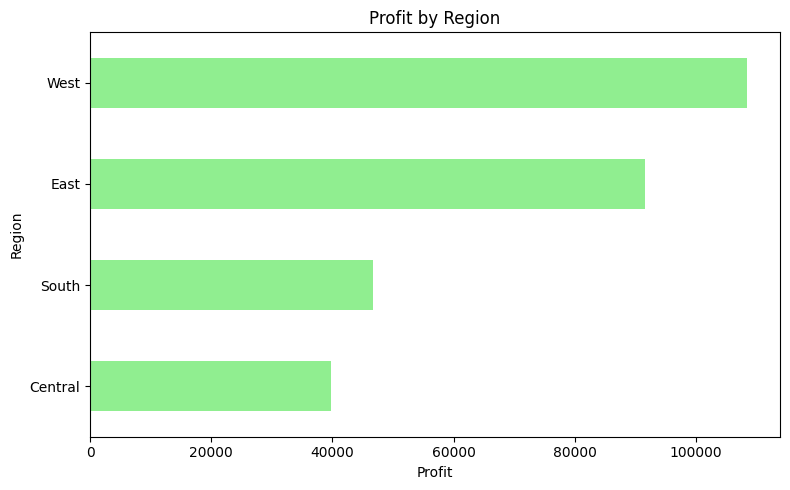

In [14]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=True)

plt.figure(figsize=(8, 5))
region_profit.plot(kind='barh', color='lightgreen')
plt.title("Profit by Region")
plt.xlabel("Profit")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


Question 2: Which region has the highest profit?

Ans: The above graph analysis leads to the conclusion of profit by range is leaded by west followed east south and central regions respectively

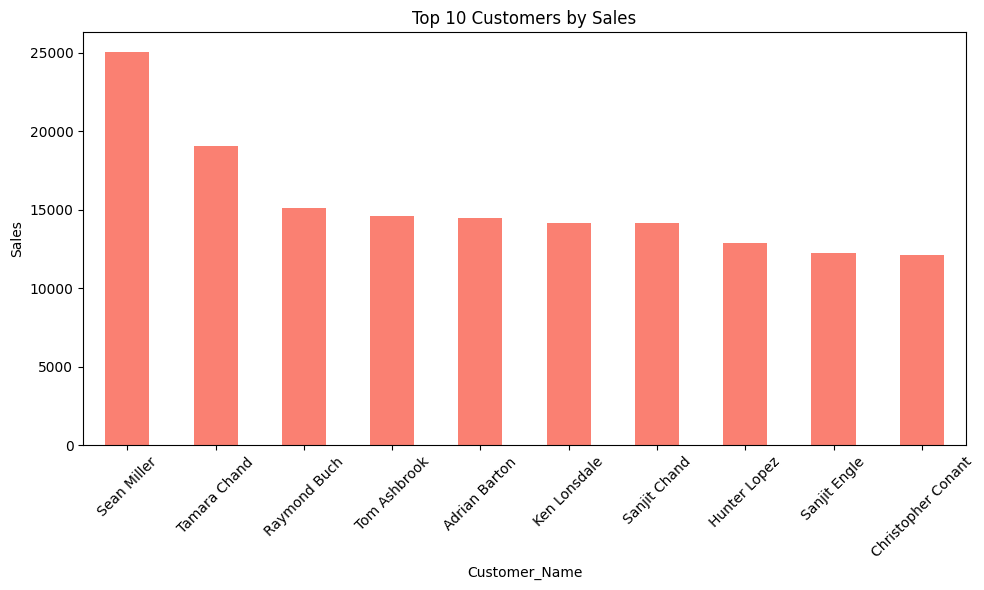

In [15]:
top_customers = df.groupby('Customer_Name')['Sales'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='salmon')
plt.title("Top 10 Customers by Sales")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Question 3: Who are the Top 10 Customers by Revenue?

 The top 10 customers list is drawn from the above graph plotted i.e, Sean,Tamara,Raymond,Tom,Adrian,Ken,Sanjit Chand,Hunter,Sanjit Engle,Christopher






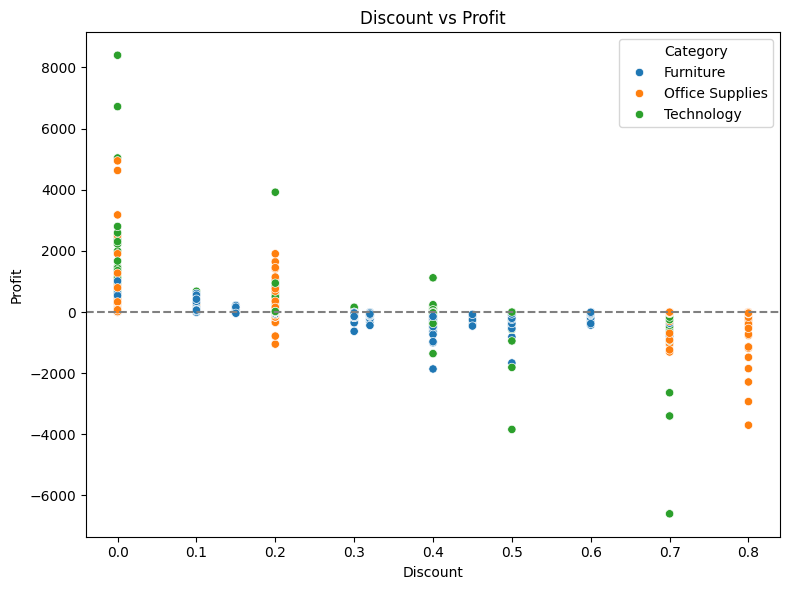

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


Question 4: Is giving discounts hurting our profit?

Ans:
No.Giving discounts does not always help profit.

Low to moderate discounts (0.1 to 0.3) might still maintain profit.

But higher discounts (0.4 and above) are often associated with negative profit, especially in Furniture and Office Supplies.

Many data points fall below the zero-profit line as discounts increase.



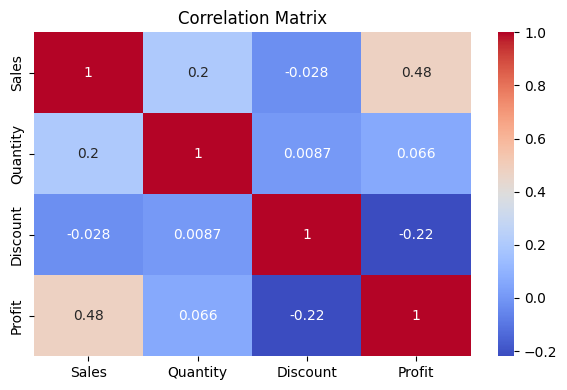

In [17]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


Question 5: What’s the strongest negative correlation in the heatmap?

Ans:
The strongest negative correlation is:
Discount vs Profit → -0.22

# **Insights from EDA:**




1.   Giving high discounts negatively impacts profit, especially beyond 20%.
2.   The Discount vs Profit scatter plot shows a clear drop in profit when discounts increase.

3.   The correlation heatmap confirms a strong negative correlation (-0.22) between Discount and Profit.
4.   Sales and Profit are positively correlated, which is expected.






